Codes used to type and visualise the answers can be found [here](https://github.com/Satriawidy/ortvay_2026)

**Question** 

On a plastic torus of major radius $R$ and a rectangular cross-section of side lengths $a$ and $b$, we coil $N$ turns of a copper wire, realizing a toroidal inductor ($b \ll R, a$). A circular conductor of radius $r$ is placed concentrically and coaxially with the coil, as seen in the top-view and side-view figures below ($r < R − a/2$, $b \ll R − a/2 − r$).

Calculate the mutual inductance of the system. How does this quantity depend on the geometric parameters $R$, $a$, and $r$, and on the exact shape of the copper wire?

(Róbert Németh)

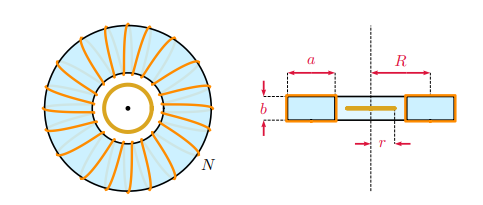

In [1]:
from IPython.display import Image
Image(filename='figures/image_16.png') 

**Answer**

The mutual inductance between two current-carrying wire is defined as the amount of magnetic flux produced by one wire that pass through the cross section of the other wire loop, divided by the current of the first wire.

\begin{equation*}
M_{12} = \frac{1}{I_1}\int d\vec{A}_2~.~\vec{B}_1
\end{equation*}

This quantity can be proven to be symmetric with respect to its two indices. It means that most of the time, we can evaluate the inductance by choosing the easier configuration to analyse. In this case, a simpler calculation would be to analyse the flux produced by the toroid that passed through the circular loop. As the circular loop is concentric, its cross section faces the $z$ direction, giving the general formula

\begin{equation*}
M = \frac{\mu_0}{4\pi}\int_{0}^{R} dr~r\int_{0}^{2\pi}d\phi\int_{C}\frac{d\vec{l}\times r}{r^3} 
\end{equation*}

where $\vec{r}$ is the vector connecting $(r, \phi)$ to $(r',\phi')$ and $d\vec{l}$ is the vector connecting $(r',\phi')$ to its nearest wire segment in the toroid.

**Divide and Conquer**

To make some progress with our analysis, let us model the toroid wire as forming 'star-like' pattern around the loop. This way, we only need to compute the flux produced by one segment of the star, and multiply by the number of windings around the toroid $N$. Looking at the figure below, we have

\begin{equation*}
    \alpha = \frac{2\pi}{2N} = \frac{\pi}{N}
\end{equation*}

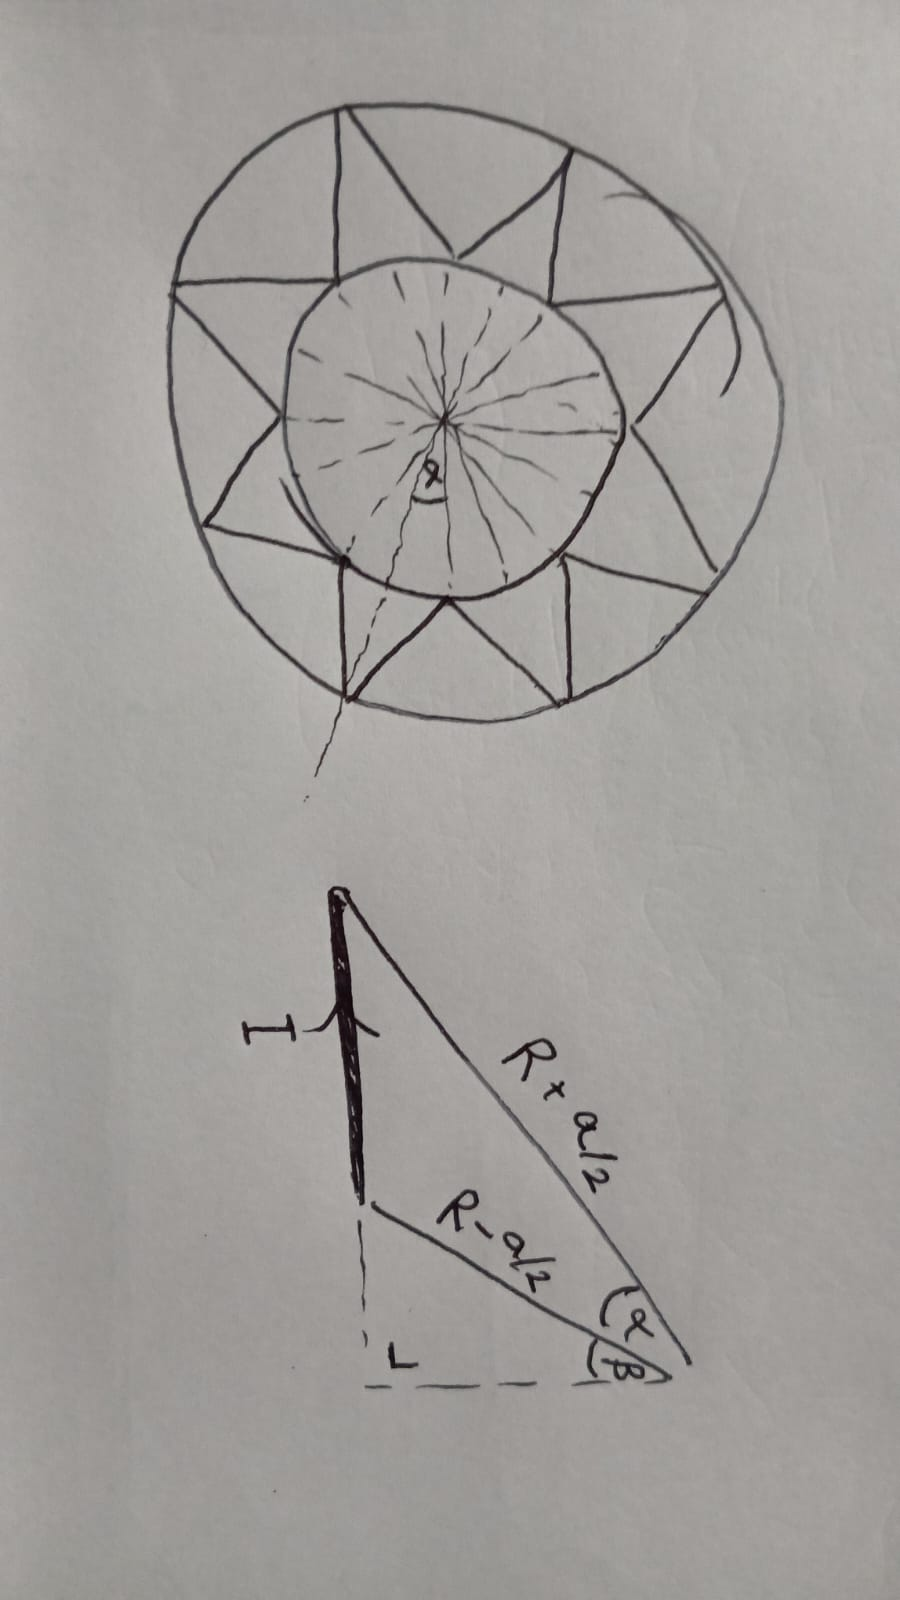

In [3]:
Image(filename='figures/image_16_help.jpeg') 

**Magnetic field from a line**

Our problem is now converted into finding magnetic field produced by a straight wire in the above figure. Let us define $h, x$ as the vertical and horizontal distance from the point. Generally, the magnetic field perpendicular to the plane would be

\begin{align*}
    B_z &= \frac{\mu_0 I}{4\pi}\int_{x_0}^{x_1}\frac{h~dx}{(h^2 + x^2)^{3/2}} ~~~~~~~[\text{use} x = h\tan(\phi)]\\\
    &= \frac{\mu_0 I}{4\pi}\int_{\beta+\alpha}^{\beta}\frac{h^2\sec^2(\phi)~d\phi}{(h^2 \sec^2(\phi))^{3/2}}\\
    &= \frac{\mu_0 I}{4\pi h}\int_{\beta+\alpha}^{\beta}d\phi~\cos(\phi)\\
    &= \frac{\mu_0 I}{4\pi h}[\sin(\alpha+\beta) - \sin(\beta)]
\end{align*}


**Trigonometry**

Now, how does $\beta$ relate to three known variables, $\alpha, R, a$? We know that $h$ can both be expressed in terms of $\alpha+\beta$ and $\beta$. It gives

\begin{align*}
    (R + a/2)\cos(\alpha+\beta) &= (R - a/2)\cos(\beta)\\
    (2R + a)[\cos(\alpha)\cos(\beta) - \sin(\alpha)\sin(\beta)] &= (2R - a)\cos(\beta)\\
    \cos(\beta)[(2R + a)\cos(\alpha) - (2R - a)] &= (2R + a)\sin(\alpha)\sin(\beta)\\
    \tan(\beta) &= \frac{(2R + a)\cos(\alpha) - (2R - a)}{(2R + a)\sin(\alpha)}
\end{align*}

We thus have
\begin{align*}
\frac{1}{h}[\sin(\alpha+\beta) - \sin(\beta)] &= \frac{\sin(\alpha)\cos(\beta) + \sin(\beta)\cos(\alpha) - \sin(\beta)}{(R-a/2)\cos(\beta)}\\
&=\frac{2}{2R-a}[\sin(\alpha) - \tan(\beta)[1-\cos(\alpha)]]\\
&=\frac{2}{2R-a}[\sin(\alpha) - \frac{(2R + a)\cos(\alpha) - (2R - a)}{(2R + a)\sin(\alpha)}[1-\cos(\alpha)]]\\
&=\frac{2[(2R+a)\sin^2(\alpha) - [(2R + a)\cos(\alpha) - (2R - a)][1-\cos(\alpha)]]}{(4R^2-a^2)\sin(\alpha)}\\
&=\frac{2[(2R+a)[1-\cos(\alpha)] + (2R - a)[1-\cos(\alpha)]]}{(4R^2-a^2)\sin(\alpha)}\\
&=\frac{8R[1-\cos(\alpha)]}{(4R^2-a^2)\sin(\alpha)}
\end{align*}

Leading to
\begin{equation*}
B_z = \frac{\mu_0 I}{4\pi}\frac{8R[1-\cos(\alpha)]}{(4R^2-a^2)\sin(\alpha)}
\end{equation*}

Assuming this magnetic field is uniform throughout the circular loop cross-section (this should be reasonably valid for $r \ll R$), we have the mutual inductance expressed as
\begin{equation*}
M = 2NB_z\frac{\pi r^2}{I} = \boxed{\frac{4\mu_0 NRr^2[1-\cos(\pi/N)]}{(4R^2-a^2)\sin(\pi/N)}}
\end{equation*}

**Behaviour**

We can do some sanity check by checking the extreme limit. First, for $a\rightarrow 0$, we have
\begin{equation*}
\lim_{a\rightarrow 0}B_z = \frac{\mu_0 I}{2\pi R}\frac{1-\cos(\alpha)}{\sin(\alpha)}
\end{equation*}

This looks quite familiar, until we take the limit $N \rightarrow \infty \implies \alpha\rightarrow 0$

\begin{equation*}
\lim_{N\rightarrow \infty}\lim_{a\rightarrow 0}B_z = \frac{\mu_0 I}{2\pi R}\frac{\frac{\pi^2}{2N^2}}{\frac{\pi}{N}} = \frac{\mu_0 I}{4NR} \implies \lim_{N\rightarrow \infty}\lim_{a\rightarrow 0}2NB_z = \frac{\mu_0 I}{2R}
\end{equation*}

which is none other than the magnetic field of a circular wire with radius $R$. This gives

\begin{equation*}
\boxed{\lim_{N\rightarrow \infty}\lim_{a\rightarrow 0} M = \frac{1}{2}\mu_0\pi r^2R}
\end{equation*}

Independently, we also got
\begin{equation*}
    \lim_{N\rightarrow \infty}2NB_z = \frac{2\mu_0I R}{4R^2-a^2} 
\end{equation*}

And a plethora of other results.